## Exploratory Data Analysis

In [1]:
import pandas as pd
import re
import nltk
import pickle

## 1. Load Data

In [2]:
data = pd.read_csv('data/desc_data.csv')

In [3]:
data.columns.tolist()

['Gender ',
 'Age',
 'Title',
 'School Type Level',
 'What is the School location',
 'School Category',
 'State']

## 2. Load Vectors

In [4]:
activities = pd.read_csv('./data/tokens/activities.csv', index_col='Unnamed: 0')

In [5]:
health_home_yes = pd.read_csv('./data/tokens/health_home_yes.csv', index_col='Unnamed: 0')

In [6]:
health_home_no = pd.read_csv('./data/tokens/health_home_no.csv', index_col='Unnamed: 0')

In [7]:
quantity_learning_less = pd.read_csv('data/tokens/quantity_learning_less.csv', index_col='Unnamed: 0')

In [8]:
quantity_learning_more = pd.read_csv('data/tokens/quantity_learning_more.csv', index_col='Unnamed: 0')

In [9]:
radio_lessons_qual_neg = pd.read_csv('data/tokens/radio_lessons_ngood.csv', index_col='Unnamed: 0')

In [10]:
radio_lessons_qual_pos = pd.read_csv('data/tokens/radio_lessons_good.csv', index_col='Unnamed: 0')

In [11]:
radio_lessons_qual_fair = pd.read_csv('data/tokens/radio_lessons_fair.csv', index_col='Unnamed: 0')

In [12]:
radio_lessons_qual_vg = pd.read_csv('data/tokens/radio_lessons_vgood.csv', index_col='Unnamed: 0')

In [13]:
radio_likes = pd.read_csv('data/tokens/radio_likes.csv', index_col='Unnamed: 0')

In [14]:
safety_home_no = pd.read_csv('data/tokens/safety_home_no.csv', index_col='Unnamed: 0')

In [15]:
safety_home_yes = pd.read_csv('data/tokens/safety_home_yes.csv', index_col='Unnamed: 0')

## 3. Data VS Vectors

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 3.1. Are you doing other things at home to learn, aside from radio lessons? What are you doing?

In [17]:
plt.rcParams['figure.figsize'] = [20 , 35]

In [18]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(activities.sum().sort_values())
plt.imshow(cloud)
plt.axis('off')
plt.savefig('data/imgs/clouds/activities.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Activities VS Gender

In [19]:
lista = [activities[data.loc[activities.index, 'Gender '] == 'Male'], activities[data.loc[activities.index, 'Gender '] == 'Female']]
title = ['Male','Female']

In [20]:
plt.rcParams['figure.figsize'] = [20 , 35]

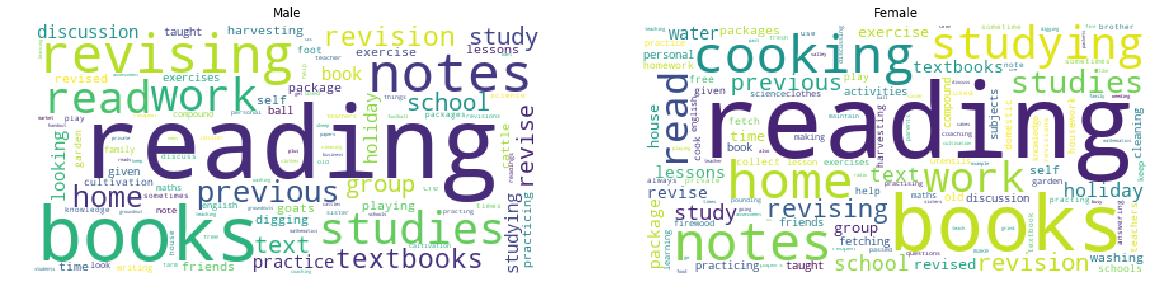

In [21]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')

plt.savefig('data/imgs/clouds/activities_gender.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Activities VS Title

In [22]:
data.Title.value_counts()

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

In [23]:
activities[data.loc[activities.index, 'Title'] == 'Parent/guardian/sibling']

Empty DataFrame
Columns: [absent, acquit, active, actives, activities, alel, alone, alote, alphabetical, alphabets, already, also, always, amongst, andfetching, another, answer, answering, anything, apart, around, assessing, assessment, assignment, attained, attending, available, back, balancing, ball, based, bases, bible, big, biology, body, book, books, borehole, borrowed, box, brain, bring, brother, brothers, build, business, busy, cakes, calculate, calculating, calculation, caltivation, capital, care, cassava, cattle, cattles, children, chores, circle, class, classes, classmates, clean, cleaness, cleaning, clear, closure, clothes, coaching, colleagues, collect, collected, collecting, come, coming, committed, comparing, compound, concentrate, contain, cook, cooking, copied, coping, coronas, counting, courage, covid, cows, cre, crops, cultivating, cultivation, cutting, daily, date, day, days, ...]
Index: []

[0 rows x 456 columns]

In [24]:
activities[data.loc[activities.index, 'Title'] == 'Teacher']

Empty DataFrame
Columns: [absent, acquit, active, actives, activities, alel, alone, alote, alphabetical, alphabets, already, also, always, amongst, andfetching, another, answer, answering, anything, apart, around, assessing, assessment, assignment, attained, attending, available, back, balancing, ball, based, bases, bible, big, biology, body, book, books, borehole, borrowed, box, brain, bring, brother, brothers, build, business, busy, cakes, calculate, calculating, calculation, caltivation, capital, care, cassava, cattle, cattles, children, chores, circle, class, classes, classmates, clean, cleaness, cleaning, clear, closure, clothes, coaching, colleagues, collect, collected, collecting, come, coming, committed, comparing, compound, concentrate, contain, cook, cooking, copied, coping, coronas, counting, courage, covid, cows, cre, crops, cultivating, cultivation, cutting, daily, date, day, days, ...]
Index: []

[0 rows x 456 columns]

Only the learners answered

#### Activities VS School Level

In [25]:
data.loc[:,'School Type Level'].value_counts()

Primary      3271
Secondary     612
ALP            34
ECD             4
AES             2
Name: School Type Level, dtype: int64

In [26]:
lista = [activities[data.loc[activities.index, 'School Type Level'] == 'Primary'], activities[data.loc[activities.index, 'School Type Level'] == 'Secondary']]
title = ['Primary','Secondary']

In [27]:
plt.rcParams['figure.figsize'] = [20 , 35]

In [28]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')

plt.savefig('data/imgs/clouds/activities_level.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Activities VS School Level

In [29]:
data.loc[:,'What is the School location'].value_counts()

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

In [30]:
lista = [activities[data.loc[activities.index, 'What is the School location'] == 'Urban'], activities[data.loc[activities.index, 'What is the School location'] == 'Rural']]
title = ['Urban','Rural']

In [31]:
plt.rcParams['figure.figsize'] = [20 , 35]

In [32]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')

plt.savefig('data/imgs/clouds/activities_location.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Activities VS Age

In [33]:
# data.loc[activities.index, 'Age'].value_counts()

In [34]:
lista = [activities[data.loc[activities.index, 'Age'] <= 19], activities[data.loc[activities.index, 'Age'] > 19]]
title = ['<= 19','> 19']

In [35]:
plt.rcParams['figure.figsize'] = [20 , 35]

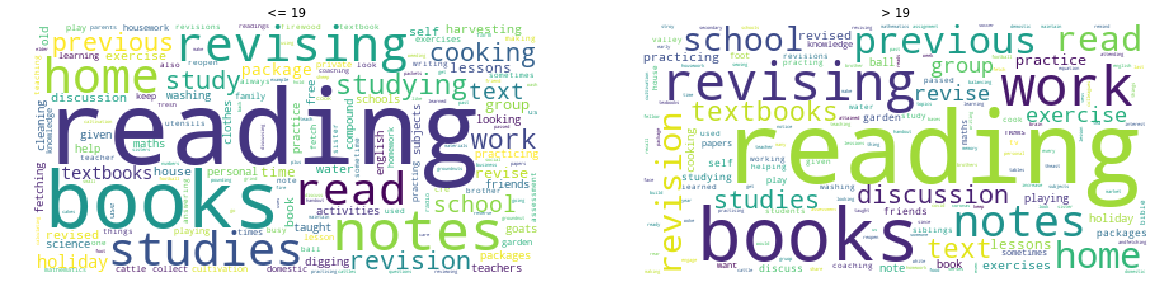

In [36]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/activities_age.jpeg',bbox_inches='tight', dpi=300)
plt.show()

### 3.2. Do you feel worried about your health due to studying/being at home during COVID-19? Why or why not?

In [37]:
lista = [health_home_yes, health_home_no]
title = ['Why?','Why not?']

In [38]:
plt.rcParams['figure.figsize'] = [20 , 35]

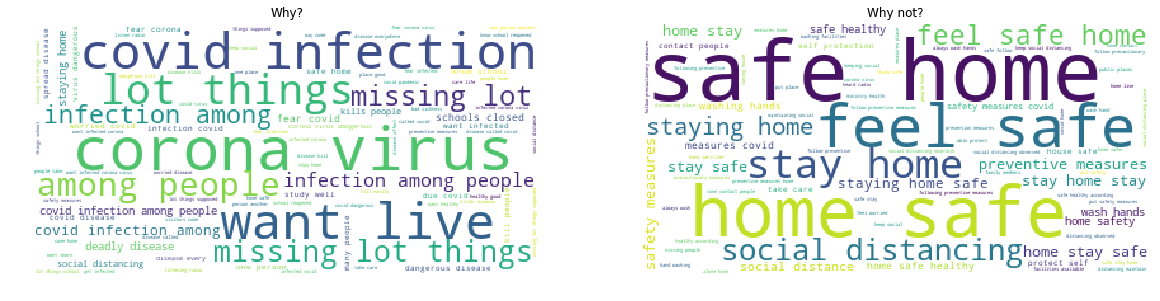

In [39]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')

plt.savefig('data/imgs/clouds/home_worry.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Worries at Home VS Gender

In [40]:
lista = [health_home_yes[data.loc[health_home_yes.index, 'Gender '] == 'Male'], health_home_yes[data.loc[health_home_yes.index, 'Gender '] == 'Female']]
title = ['Male','Female']

In [41]:
plt.rcParams['figure.figsize'] = [20 , 35]

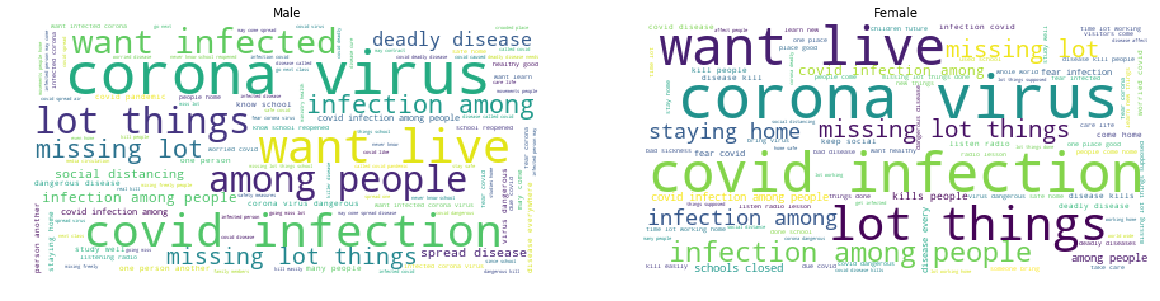

In [42]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/home_worry_gender.jpeg',bbox_inches='tight', dpi=300)   
plt.show()

#### Worries at Home VS Title

In [43]:
data.Title.value_counts()

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

In [44]:
health_home_yes[data.loc[health_home_yes.index, 'Title'] == 'Learner'].shape[0]

470

In [45]:
health_home_yes[data.loc[health_home_yes.index, 'Title'] == 'Parent/guardian/sibling'].shape[0]

203

In [46]:
health_home_yes[data.loc[health_home_yes.index, 'Title'] == 'Teacher'].shape[0]

99

In [47]:
lista = [health_home_yes[data.loc[health_home_yes.index, 'Title'] == 'Learner'], health_home_yes[data.loc[health_home_yes.index, 'Title'] == 'Teacher']]
title = ['Learner','Teacher']

In [48]:
plt.rcParams['figure.figsize'] = [20 , 35]

In [49]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/home_worry_title.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Worries at Home VS School Level

In [50]:
data.loc[:,'School Type Level'].value_counts()

Primary      3271
Secondary     612
ALP            34
ECD             4
AES             2
Name: School Type Level, dtype: int64

In [51]:
lista = [health_home_yes[data.loc[health_home_yes.index, 'School Type Level'] == 'Primary'], health_home_yes[data.loc[health_home_yes.index, 'School Type Level'] == 'Secondary']]
title = ['Primary','Secondary']

In [52]:
plt.rcParams['figure.figsize'] = [20 , 35]

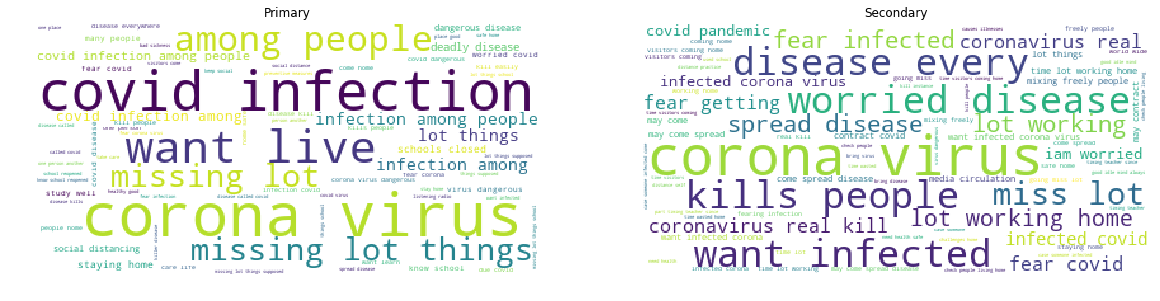

In [53]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/home_worry_level.jpeg',bbox_inches='tight', dpi=300) 
plt.show()

#### Worries VS School Place

In [54]:
data.loc[:,'What is the School location'].value_counts()

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

In [55]:
lista = [health_home_yes[data.loc[health_home_yes.index, 'What is the School location'] == 'Urban'], health_home_yes[data.loc[health_home_yes.index, 'What is the School location'] == 'Rural']]
title = ['Urban','Rural']

In [56]:
plt.rcParams['figure.figsize'] = [20 , 35]

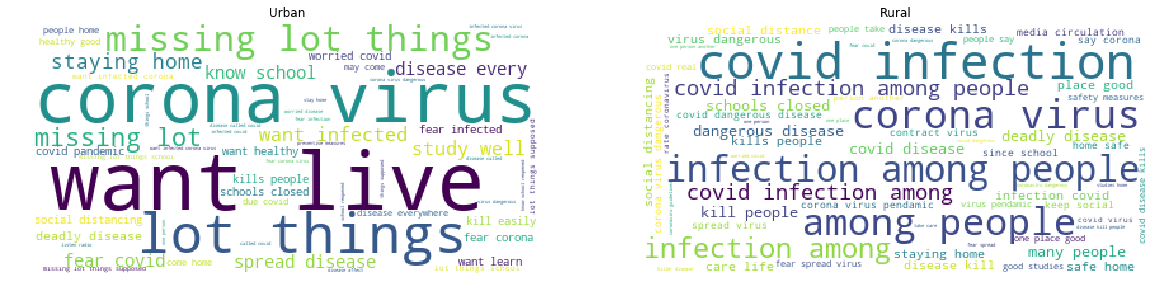

In [57]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/home_worry_place.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Worries at Home VS Age

In [58]:
data.loc[activities.index, 'Age'].value_counts()

15.0    198
16.0    182
17.0    181
18.0    152
14.0    152
13.0    115
19.0    113
20.0     94
12.0     73
21.0     44
22.0     31
10.0     30
11.0     30
23.0     25
9.0      14
24.0     13
25.0      8
26.0      7
8.0       6
27.0      6
7.0       4
28.0      4
29.0      3
30.0      2
34.0      2
32.0      2
31.0      2
51.0      1
45.0      1
5.0       1
36.0      1
6.0       1
46.0      1
Name: Age, dtype: int64

In [59]:
lista = [health_home_yes[data.loc[health_home_yes.index, 'Age'] <= 19], health_home_yes[data.loc[health_home_yes.index, 'Age'] > 19]]
title = ['<= 19','> 19']

In [60]:
plt.rcParams['figure.figsize'] = [20 , 35]

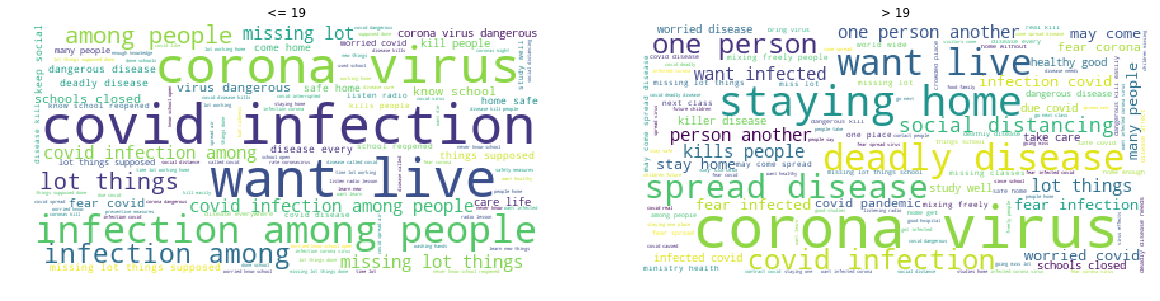

In [61]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/home_worry_age.jpeg',bbox_inches='tight', dpi=300)
plt.show()

### 3.3. Do you feel worried about your safety due to being at home during COVID-19? Why or why not?

In [62]:
lista = [safety_home_no, safety_home_yes]
title = ['Why not?','Why?']

In [63]:
plt.rcParams['figure.figsize'] = [20 , 35]

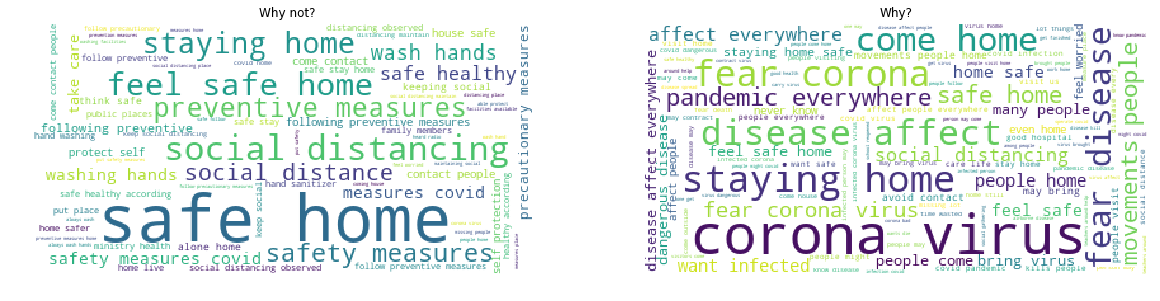

In [64]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/safety_worry.jpeg',bbox_inches='tight', dpi=300)
plt.show()

In [65]:
safety_home_no.shape[1], safety_home_yes.shape[1]

(1242, 1936)

#### Safety at Home VS Gender

In [66]:
lista = [safety_home_yes[data.loc[safety_home_yes.index, 'Gender '] == 'Male'], safety_home_yes[data.loc[safety_home_yes.index, 'Gender '] == 'Female']]
title = ['Male','Female']

In [67]:
plt.rcParams['figure.figsize'] = [20 , 35]

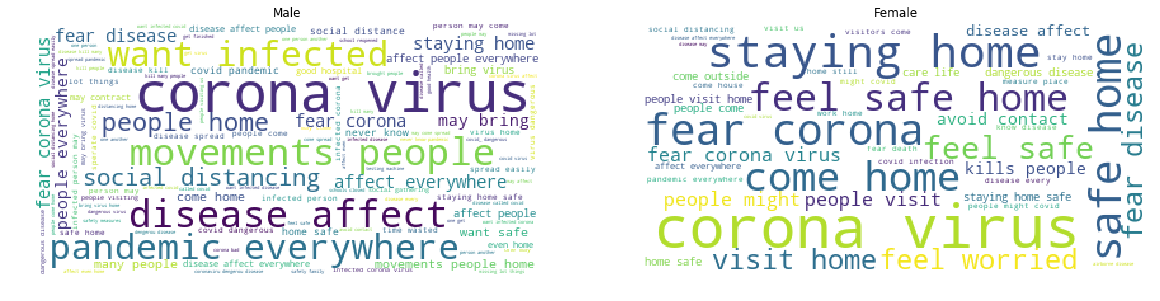

In [68]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/safety_worry_gender.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Safety at Home VS Title

In [69]:
data.Title.value_counts()

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

In [70]:
safety_home_yes[data.loc[safety_home_yes.index, 'Title'] == 'Parent/guardian/sibling'].shape[0]

205

In [71]:
safety_home_yes[data.loc[safety_home_yes.index, 'Title'] == 'Teacher'].shape[0]

75

In [72]:
safety_home_yes[data.loc[safety_home_yes.index, 'Title'] == 'Learner'].shape[0]

447

In [73]:
lista = [safety_home_yes[data.loc[safety_home_yes.index, 'Title'] == 'Learner'], safety_home_yes[data.loc[safety_home_yes.index, 'Title'] == 'Teacher']]
title = ['Learner','Teacher']

In [74]:
plt.rcParams['figure.figsize'] = [20 , 35]

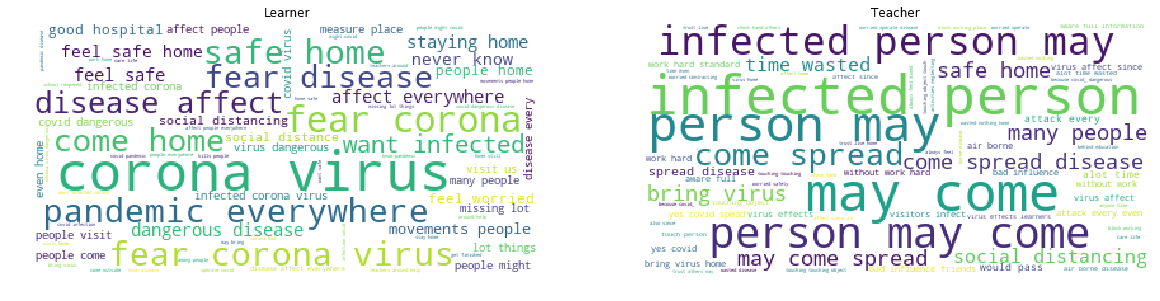

In [75]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/safety_worry_title.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Safety at Home VS School Level

In [76]:
data.loc[:,'School Type Level'].value_counts()

Primary      3271
Secondary     612
ALP            34
ECD             4
AES             2
Name: School Type Level, dtype: int64

In [77]:
lista = [safety_home_yes[data.loc[safety_home_yes.index, 'School Type Level'] == 'Primary'], 
         safety_home_yes[data.loc[safety_home_yes.index, 'School Type Level'] == 'Secondary']]
title = ['Primary','Secondary']

In [78]:
plt.rcParams['figure.figsize'] = [20 , 35]

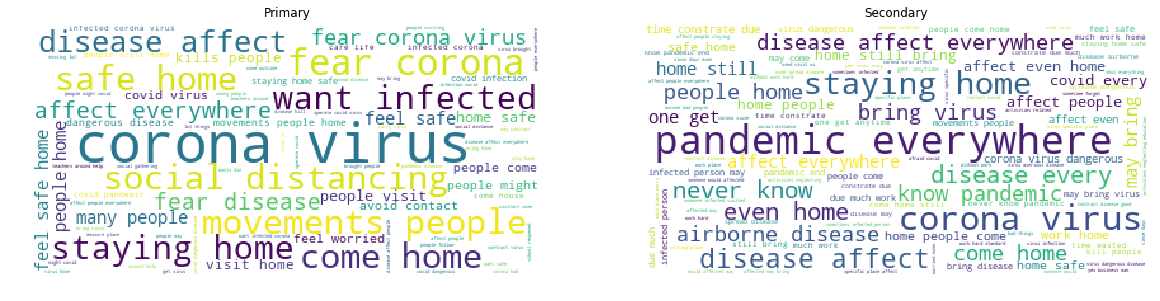

In [79]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()

#### Safety at Home VS School Level

In [80]:
data.loc[:,'What is the School location'].value_counts()

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

In [81]:
lista = [safety_home_yes[data.loc[safety_home_yes.index, 'What is the School location'] == 'Urban'], safety_home_yes[data.loc[safety_home_yes.index, 'What is the School location'] == 'Rural']]
title = ['Urban','Rural']

In [82]:
plt.rcParams['figure.figsize'] = [20 , 35]

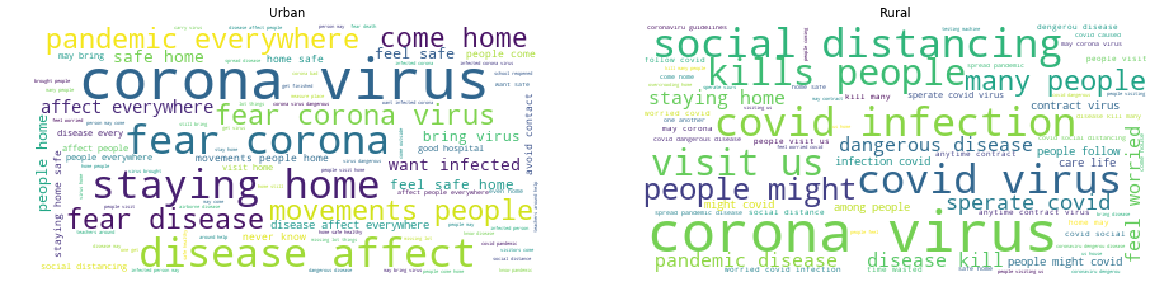

In [83]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/safety_worry_location.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Safety at Home VS Age

In [84]:
data.loc[activities.index, 'Age'].value_counts()

15.0    198
16.0    182
17.0    181
18.0    152
14.0    152
13.0    115
19.0    113
20.0     94
12.0     73
21.0     44
22.0     31
10.0     30
11.0     30
23.0     25
9.0      14
24.0     13
25.0      8
26.0      7
8.0       6
27.0      6
7.0       4
28.0      4
29.0      3
30.0      2
34.0      2
32.0      2
31.0      2
51.0      1
45.0      1
5.0       1
36.0      1
6.0       1
46.0      1
Name: Age, dtype: int64

In [85]:
lista = [safety_home_yes[data.loc[safety_home_yes.index, 'Age'] <= 19], safety_home_yes[data.loc[safety_home_yes.index, 'Age'] > 19]]
title = ['<= 19','> 19']

In [86]:
plt.rcParams['figure.figsize'] = [20 , 35]

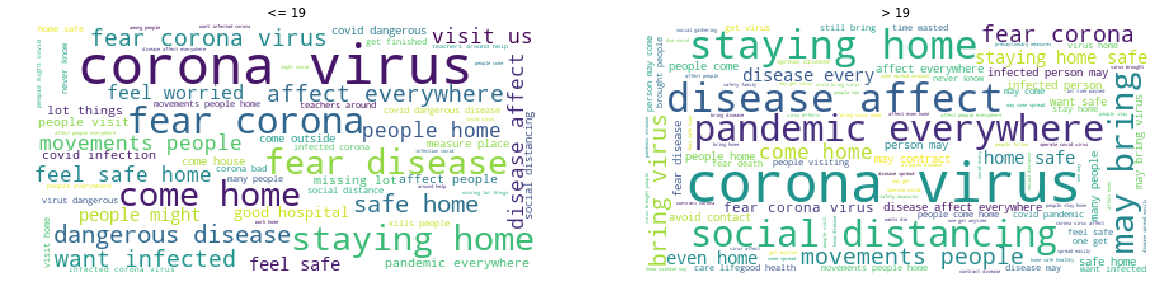

In [87]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/safety_worry_age.jpeg',bbox_inches='tight', dpi=300)
plt.show()

### 3.4. Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why

In [88]:
lista = [quantity_learning_less, quantity_learning_more]
title = ['Why less?','Why more?']

In [89]:
plt.rcParams['figure.figsize'] = [20 , 35]

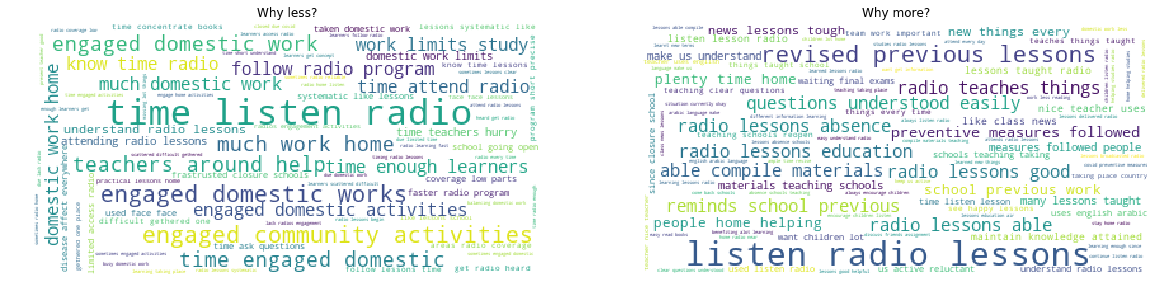

In [90]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant.jpeg',bbox_inches='tight', dpi=300)
plt.show()

In [91]:
quantity_learning_less.shape[0], quantity_learning_more.shape[0]

(1249, 80)

#### Learning Less VS Gender

In [92]:
lista = [quantity_learning_less[data.loc[quantity_learning_less.index, 'Gender '] == 'Male'], quantity_learning_less[data.loc[quantity_learning_less.index, 'Gender '] == 'Female']]
title = ['Male','Female']

In [93]:
plt.rcParams['figure.figsize'] = [20 , 35]

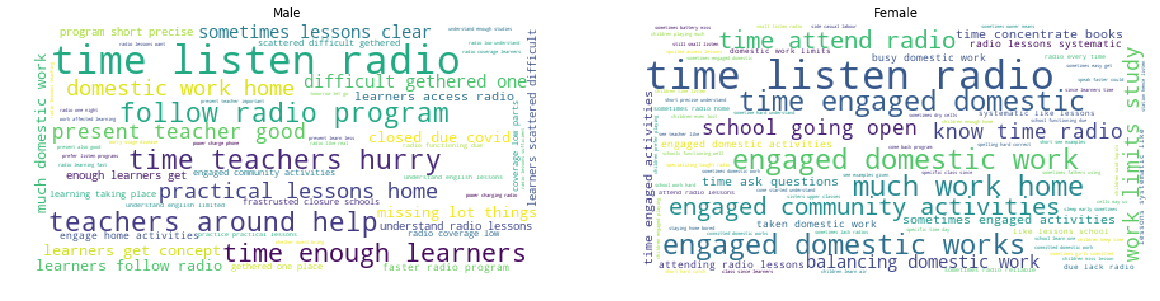

In [94]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant_gender.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Learning Less VS Title

In [95]:
data.Title.value_counts()

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

In [96]:
quantity_learning_less[data.loc[quantity_learning_less.index, 'Title'] == 'Parent/guardian/sibling'].shape[0]

337

In [97]:
quantity_learning_less[data.loc[quantity_learning_less.index, 'Title'] == 'Teacher'].shape[0]

150

In [98]:
quantity_learning_less[data.loc[quantity_learning_less.index, 'Title'] == 'Parent/guardian/sibling'].shape[0]

337

In [99]:
lista = [quantity_learning_less[data.loc[quantity_learning_less.index, 'Title'] == 'Learner'], quantity_learning_less[data.loc[quantity_learning_less.index, 'Title'] == 'Teacher']]
title = ['Learner','Teacher']

In [100]:
plt.rcParams['figure.figsize'] = [20 , 35]

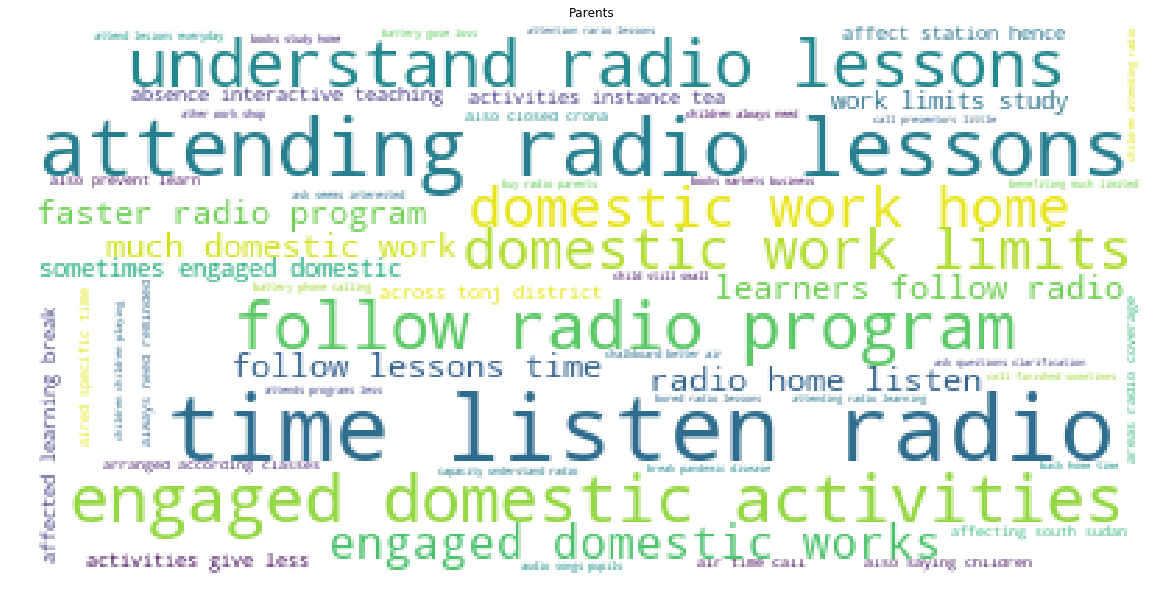

In [101]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(quantity_learning_less[data.loc[quantity_learning_less.index, 'Title'] == 'Parent/guardian/sibling'].sum())
plt.title('Parents')
plt.imshow(cloud)
plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant_title_parents.jpeg',bbox_inches='tight', dpi=300)   
plt.show()

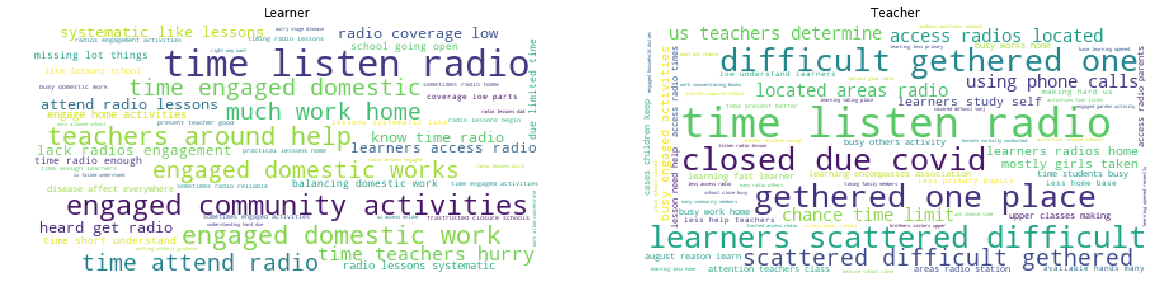

In [102]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant_title.jpeg',bbox_inches='tight', dpi=300)   
plt.show()

#### Learning Less VS School Level

In [103]:
data.loc[:,'School Type Level'].value_counts()

Primary      3271
Secondary     612
ALP            34
ECD             4
AES             2
Name: School Type Level, dtype: int64

In [104]:
lista = [quantity_learning_less[data.loc[quantity_learning_less.index, 'School Type Level'] == 'Primary'], quantity_learning_less[data.loc[quantity_learning_less.index, 'School Type Level'] == 'Secondary']]
title = ['Primary','Secondary']

In [105]:
plt.rcParams['figure.figsize'] = [20 , 35]

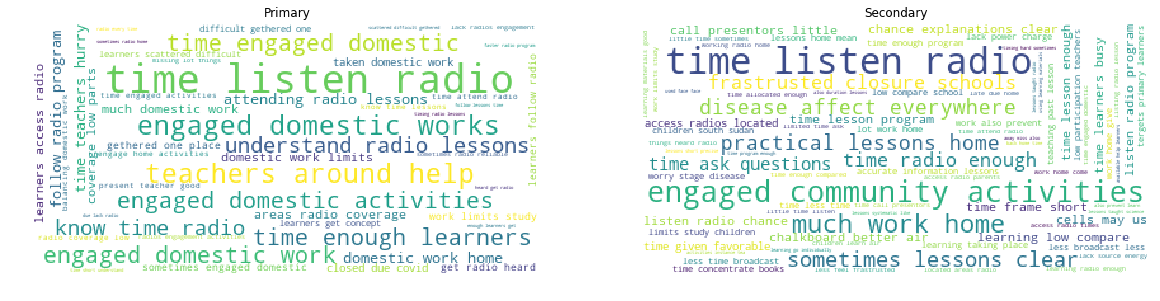

In [106]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant_level.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Learning Less VS School Location

In [107]:
data.loc[:,'What is the School location'].value_counts()

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

In [108]:
lista = [quantity_learning_less[data.loc[quantity_learning_less.index, 'What is the School location'] == 'Urban'], quantity_learning_less[data.loc[quantity_learning_less.index, 'What is the School location'] == 'Rural']]
title = ['Urban','Rural']

In [109]:
plt.rcParams['figure.figsize'] = [20 , 35]

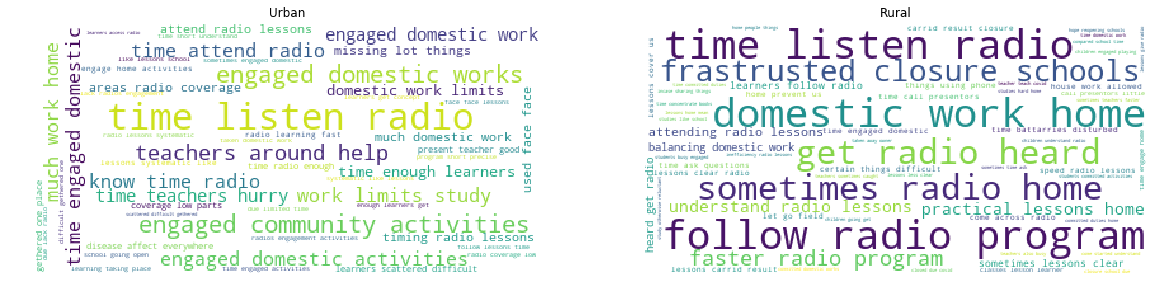

In [110]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant_location.jpeg',bbox_inches='tight', dpi=300)
plt.show()

#### Learning Less VS Age

In [111]:
data.loc[quantity_learning_less.index, 'Age'].value_counts()

15.0    94
17.0    88
18.0    84
16.0    84
14.0    73
        ..
61.0     1
8.0      1
64.0     1
7.0      1
65.0     1
Name: Age, Length: 61, dtype: int64

In [112]:
lista = [quantity_learning_less[data.loc[quantity_learning_less.index, 'Age'] <= 19], quantity_learning_less[data.loc[quantity_learning_less.index, 'Age'] > 19]]
title = ['<= 19','> 19']

In [113]:
plt.rcParams['figure.figsize'] = [20 , 35]

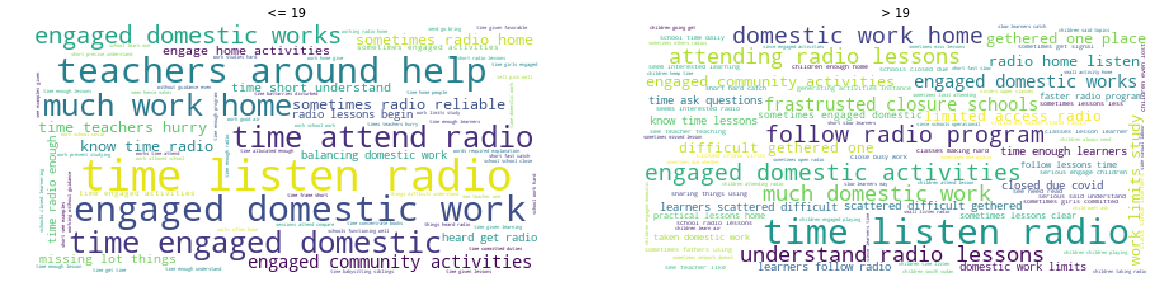

In [114]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/learning_quant_age.jpeg',bbox_inches='tight', dpi=300)   
plt.show()

### 3.5. What is the quality of the radio lessons? How can the radio lessons be improved?

In [115]:
lista = [radio_lessons_qual_neg, radio_lessons_qual_fair]
title = ['No good quality','Fair quality']

In [116]:
plt.rcParams['figure.figsize'] = [20 , 35]

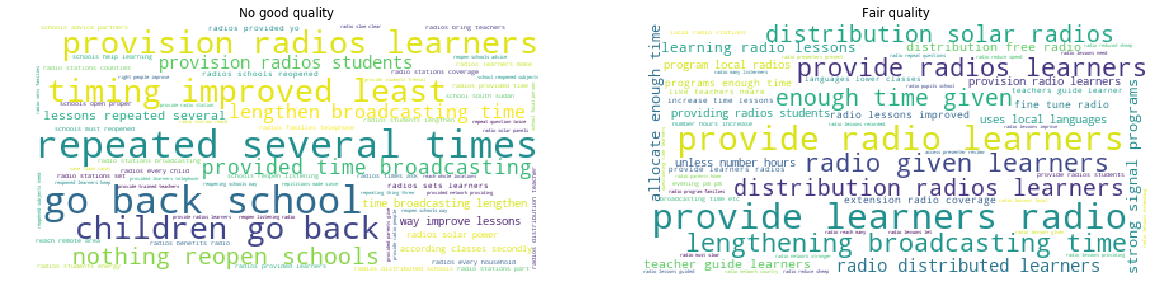

In [117]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_neg.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

In [118]:
lista = [radio_lessons_qual_pos, radio_lessons_qual_vg]
title = ['Good quality','Very good quality']

In [119]:
plt.rcParams['figure.figsize'] = [20 , 35]

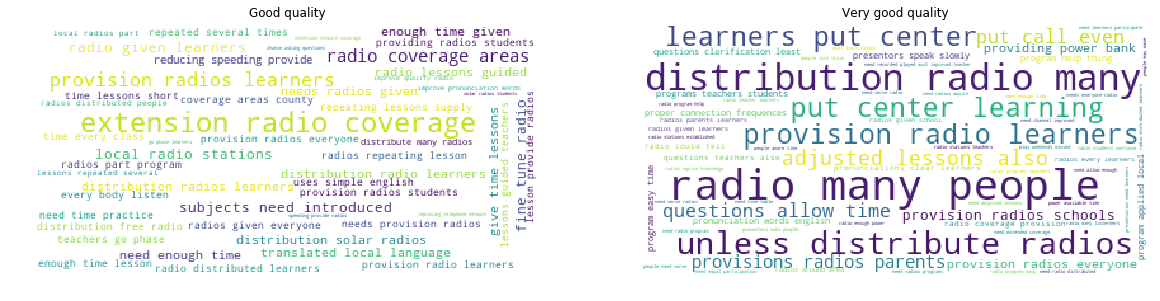

In [120]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_pos.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

In [121]:
radio_lessons_qual_neg.shape, radio_lessons_qual_pos.shape

((172, 389), (621, 1138))

#### Radio Lessons Not Good Quality VS Gender

In [122]:
lista = [radio_lessons_qual_pos[data.loc[radio_lessons_qual_pos.index, 'Gender '] == 'Male'], radio_lessons_qual_pos[data.loc[radio_lessons_qual_pos.index, 'Gender '] == 'Female']]
title = ['Male','Female']

In [123]:
plt.rcParams['figure.figsize'] = [20 , 35]

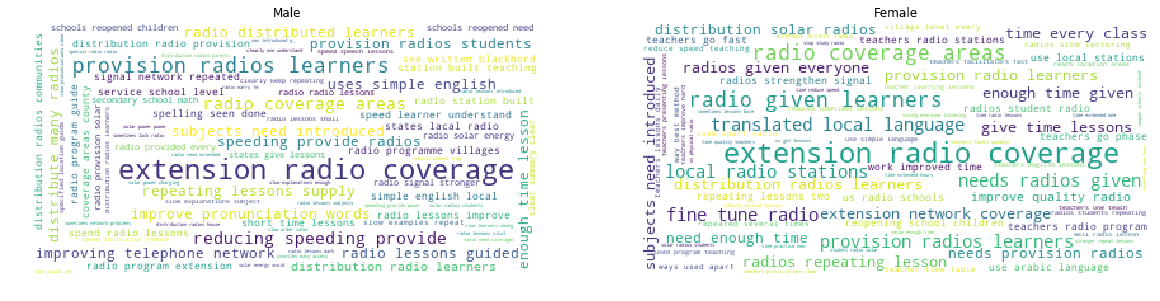

In [124]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_good_gender.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Lessons not Good Quality VS Title

In [125]:
data.Title.value_counts()

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

In [126]:
radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Parent/guardian/sibling'].shape

(59, 389)

In [127]:
radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Teacher'].shape

(9, 389)

In [128]:
radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Learner'].shape

(104, 389)

In [129]:
lista = [radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Learner'], 
         radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Teacher']]
title = ['Learner','Teacher']

In [130]:
plt.rcParams['figure.figsize'] = [20 , 35]

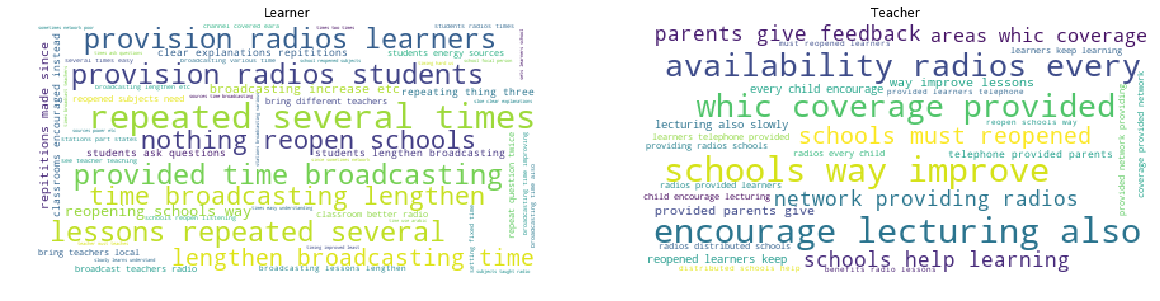

In [131]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_ngood_title.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Lessons Not Good Quality VS School Level

In [132]:
data.loc[:,'School Type Level'].value_counts()

Primary      3271
Secondary     612
ALP            34
ECD             4
AES             2
Name: School Type Level, dtype: int64

In [133]:
lista = [radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'School Type Level'] == 'Primary'],
         radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'School Type Level'] == 'Secondary']]
title = ['Primary','Secondary']

In [134]:
plt.rcParams['figure.figsize'] = [20 , 35]

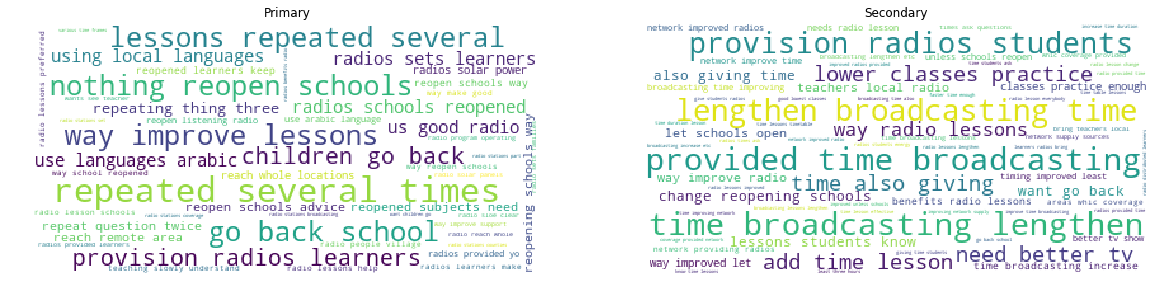

In [135]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_ngood_level.jpeg',bbox_inches='tight', dpi=300)      
plt.show()

#### Radio Lessons Not Good Quality VS School Level

In [136]:
data.loc[:,'What is the School location'].value_counts()

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

In [137]:
lista = [radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'What is the School location'] == 'Urban'],
         radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'What is the School location'] == 'Rural']]
title = ['Urban','Rural']

In [138]:
plt.rcParams['figure.figsize'] = [20 , 35]

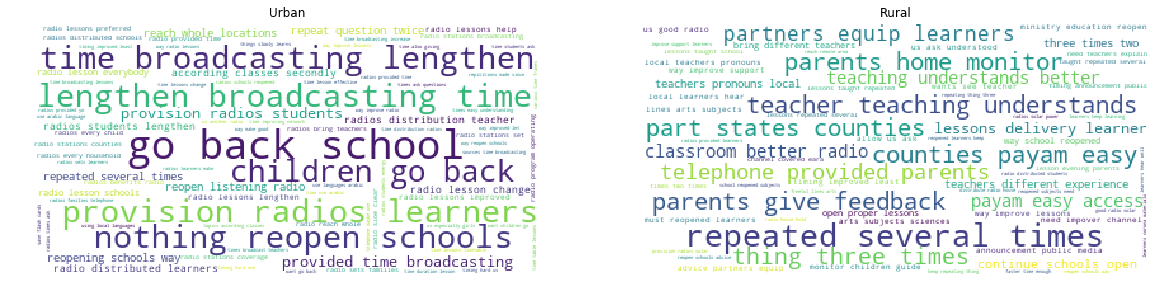

In [139]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_ngood_location.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Lessons Not Good Quality VS Age

In [140]:
data.loc[radio_lessons_qual_neg.index, 'Age'].value_counts()

15.0    18
16.0    12
17.0    11
20.0     9
18.0     9
36.0     7
19.0     6
14.0     6
13.0     6
22.0     6
35.0     5
26.0     5
45.0     5
34.0     4
40.0     4
39.0     4
32.0     4
30.0     4
21.0     4
23.0     4
12.0     3
38.0     3
28.0     3
51.0     3
9.0      2
55.0     2
37.0     2
48.0     2
56.0     2
29.0     2
25.0     2
50.0     1
33.0     1
57.0     1
10.0     1
8.0      1
11.0     1
24.0     1
52.0     1
46.0     1
27.0     1
53.0     1
6.0      1
68.0     1
Name: Age, dtype: int64

In [141]:
lista = [radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Age'] <= 19], 
         radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Age'] > 19]]
title = ['<= 19','> 19']

In [142]:
plt.rcParams['figure.figsize'] = [20 , 35]

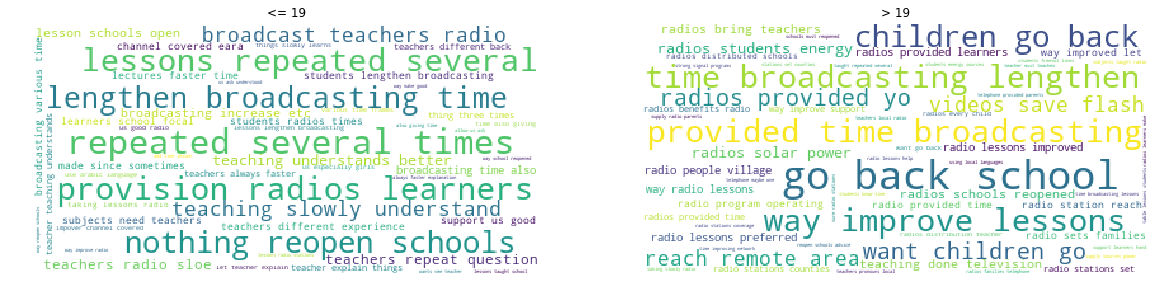

In [143]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_lessons_improv_ngood_age.jpeg',bbox_inches='tight', dpi=300)     
plt.show()

### 3.6. What do you like most about the radio lessons? What are the challenges with learning on the radio?

In [144]:
plt.rcParams['figure.figsize'] = [10 , 25]

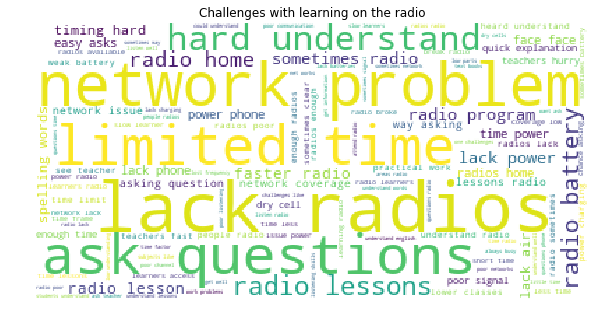

In [145]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(radio_likes.sum().sort_values())
plt.title('Challenges with learning on the radio')
plt.imshow(cloud)
plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Likes VS Gender

In [146]:
lista = [radio_likes[data.loc[radio_likes.index, 'Gender '] == 'Male'],
         radio_likes[data.loc[radio_likes.index, 'Gender '] == 'Female']]
title = ['Male','Female']

In [147]:
plt.rcParams['figure.figsize'] = [20 , 35]

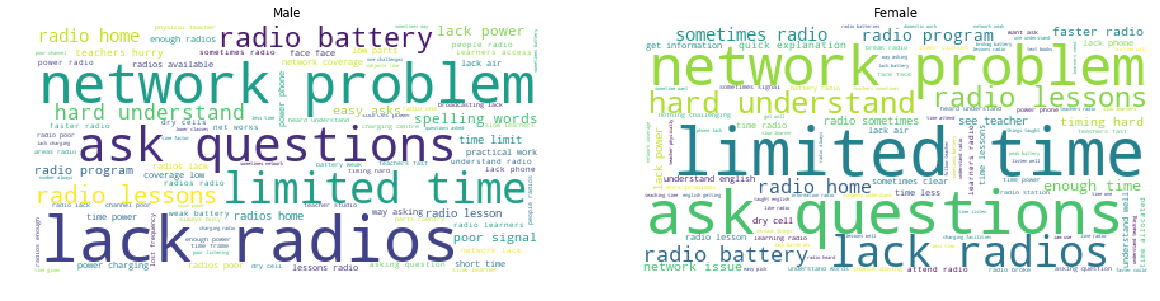

In [148]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge_gender.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Likes VS Title

In [149]:
data.Title.value_counts()

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

In [150]:
radio_likes[data.loc[radio_likes.index, 'Title'] == 'Parent/guardian/sibling'].shape

(374, 2821)

In [151]:
radio_likes[data.loc[radio_likes.index, 'Title'] == 'Learner'].shape

(837, 2821)

In [152]:
radio_likes[data.loc[radio_likes.index, 'Title'] == 'Teacher'].shape

(164, 2821)

In [153]:
lista = [radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Learner'], 
         radio_lessons_qual_neg[data.loc[radio_lessons_qual_neg.index, 'Title'] == 'Teacher']]
title = ['Learner','Teacher']

In [154]:
plt.rcParams['figure.figsize'] = [20 , 35]

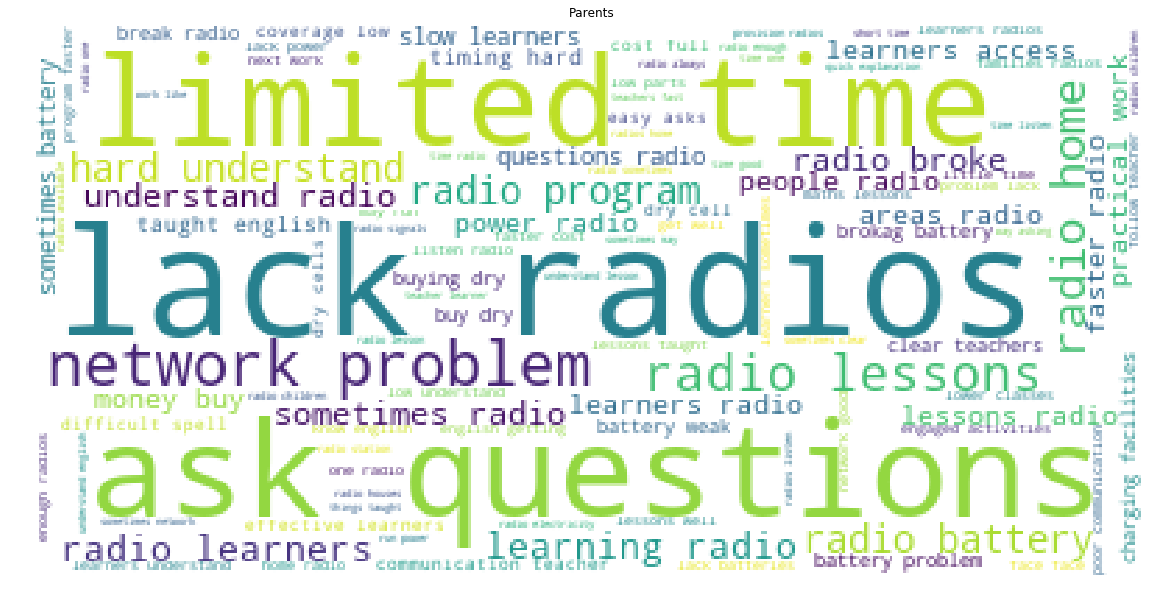

In [155]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(radio_likes[data.loc[radio_likes.index, 'Title'] == 'Parent/guardian/sibling'].sum())
plt.title('Parents')
plt.imshow(cloud)
plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge_title_parents.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

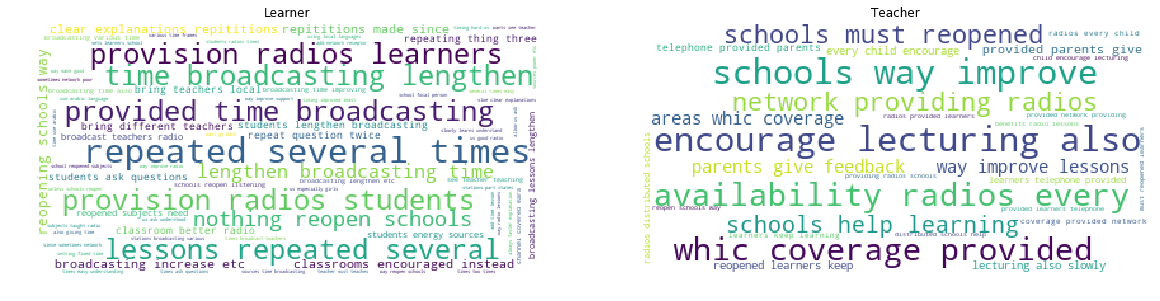

In [156]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge_title.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Likes VS School Level

In [157]:
data.loc[:,'School Type Level'].value_counts()

Primary      3271
Secondary     612
ALP            34
ECD             4
AES             2
Name: School Type Level, dtype: int64

In [158]:
lista = [radio_likes[data.loc[radio_likes.index, 'School Type Level'] == 'Primary'],
         radio_likes[data.loc[radio_likes.index, 'School Type Level'] == 'Secondary']]
title = ['Primary','Secondary']

In [159]:
plt.rcParams['figure.figsize'] = [20 , 35]

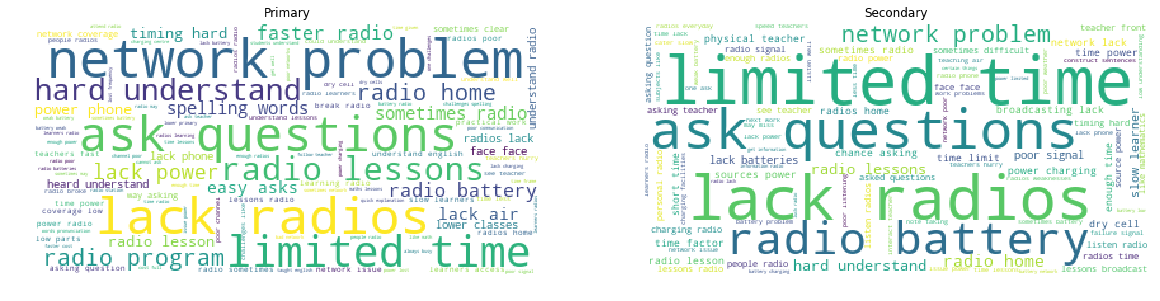

In [160]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge_level.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Likes VS School Level

In [161]:
data.loc[:,'What is the School location'].value_counts()

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

In [162]:
lista = [radio_likes[data.loc[radio_likes.index, 'What is the School location'] == 'Urban'],
         radio_likes[data.loc[radio_likes.index, 'What is the School location'] == 'Rural']]
title = ['Urban','Rural']

In [163]:
plt.rcParams['figure.figsize'] = [20 , 35]

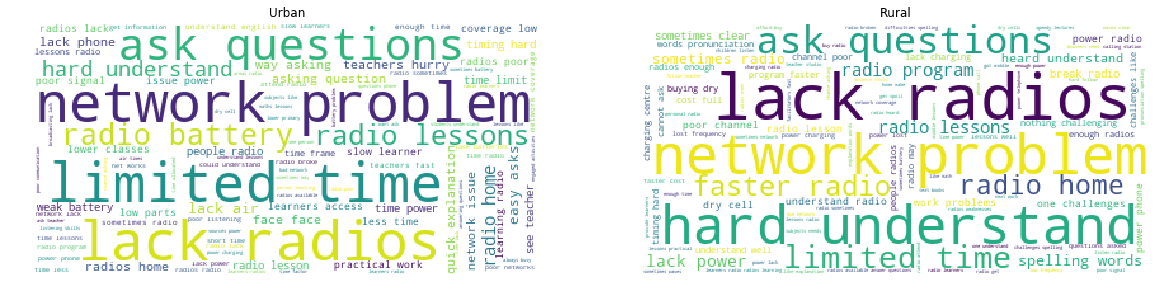

In [164]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge_location.jpeg',bbox_inches='tight', dpi=300)    
plt.show()

#### Radio Likes VS Age

In [165]:
data.loc[radio_likes.index, 'Age'].value_counts()

15.0    104
17.0     99
16.0     94
18.0     87
14.0     79
       ... 
8.0       1
64.0      1
7.0       1
70.0      1
65.0      1
Name: Age, Length: 62, dtype: int64

In [166]:
lista = [radio_likes[data.loc[radio_likes.index, 'Age'] <= 19], radio_likes[data.loc[radio_likes.index, 'Age'] > 19]]
title = ['<= 19','> 19']

In [167]:
plt.rcParams['figure.figsize'] = [20 , 35]

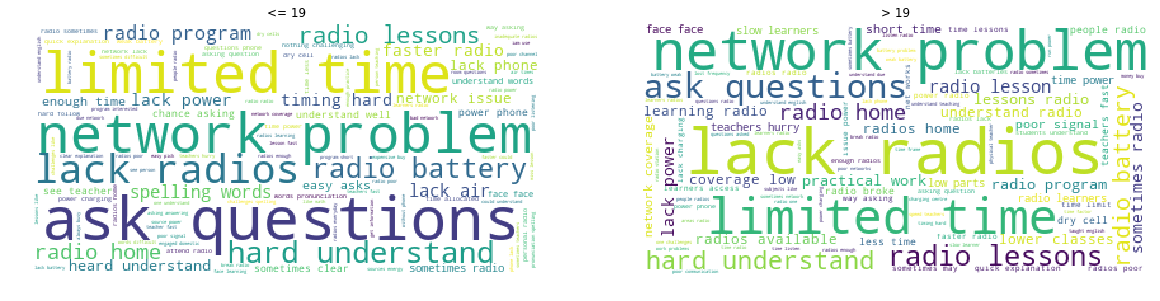

In [168]:
for i, tokens in enumerate(lista):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tokens.sum().sort_values())
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(cloud)
    plt.axis('off')
plt.savefig('data/imgs/clouds/radio_challenge_age.jpeg',bbox_inches='tight', dpi=300)    
plt.show()